# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


#Tener todo en un csv para trabajar desde aqui

In [856]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [857]:
#Leer el df de un archivo
ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD.csv'
df_unidoLDG = pd.read_csv(ruta_archivo)

In [858]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG.head())

,rol,categoria_dominio_correo,opened,clicked,Correo de marketing ID,Campaña ID,info_FECHA_MAIL_ACTIVO,info_FECHA_ACTIVO,info_FECHA_ACTIVO_NUM_CELULAR,info_ESTADOCIVIL,tiene_numero_celular,tiene_linkedin,base_SEXO,base_año nac,base_NACIONALIDAD,base_ESTADONACIMIENTO,base_exatec personalizado,base_ESTADO_RESIDENCIA,base_PAIS_RESIDENCIA,base_AñoGrad,base_Tipo Escuela,base_SIGLASDELPROGRAMA,base_NIVELACADEMICO,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,ha_actualizado_teléfono,HizoPrepaTec,suscrito_FechaRegistro,giveaway_fecha,evento_EventName,evento_Campus,evento_Category,evento_CheckedIn,evento_attendeeStatus,es_LDGincubadora
0,Exatec,Genérico,1,1,3.622020e+11,10949903422.0,2005-09-06 00:00:00,05/10/1995 00:00,2005-09-06 00:00:00,Soltero,0,0,Masculino,1942,Indefinido,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,LAE,5,A,Monterrey,Educación,Mexicana,0,I,1,0,07/06/2024 17:23,25/09/2024 22:18,"Regreso a Casa | 50, 55, 60 y más aniversarios",TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0
1,Exatec,Genérico,1,1,3.622020e+11,10949903422.0,2005-09-06 00:00:00,05/10/1995 00:00,2005-09-06 00:00:00,Soltero,0,0,Masculino,1942,Indefinido,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,LAE,5,A,Monterrey,Educación,Mexicana,0,I,1,0,07/06/2024 17:23,25/09/2024 22:18,"Regreso a Casa | 50, 55, 60 y más aniversarios",TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0
2,Exatec,Genérico,1,0,3.633040e+11,10949903422.0,22/09/2017 00:00,11/03/2003 00:00,22/09/2017 00:00,Casado,1,0,Masculino,1942,Mexicana,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,10/09/2020 14:25,25/09/2024 22:18,Regreso a Casa Monterrey 2024,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0
3,Exatec,Genérico,1,0,3.633040e+11,10949903422.0,22/09/2017 00:00,11/03/2003 00:00,22/09/2017 00:00,Casado,1,0,Masculino,1942,Mexicana,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,10/09/2020 14:25,25/09/2024 22:18,Regreso a Casa Monterrey 2024,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0
4,Exatec,Genérico,1,0,3.633040e+11,10949903422.0,22/09/2017 00:00,11/03/2003 00:00,22/09/2017 00:00,Casado,1,0,Masculino,1942,Mexicana,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,10/09/2020 14:25,25/09/2024 22:18,Regreso a Casa Monterrey 2024,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0


Anteriormente, para las variables categóricas, decidimos reemplazar los valores NaN con la moda. Sin embargo, aunque base_AREAORGANIZACIONAL es una variable categórica, la moda resultó ser 0, un valor que no aporta información relevante. Por esta razón, se recalculó la moda, ignorando los valores 0, y luego se usó este nuevo valor de moda para reemplazar los NaN en la columna.

In [859]:
# Calcular la moda de la columna 'base_AREAORGANIZACIONAL' excluyendo los valores 0 o '0'
moda_base_AREAORGANIZACIONAL = df_unidoLDG.loc[(df_unidoLDG['base_AREAORGANIZACIONAL'] != 0) &
                                               (df_unidoLDG['base_AREAORGANIZACIONAL'] != '0'),
                                               'base_AREAORGANIZACIONAL'].mode()[0]

# Reemplazar NaN, 0 (enteros) y '0' (cadenas) por la moda calculada
df_unidoLDG['base_AREAORGANIZACIONAL'] = df_unidoLDG['base_AREAORGANIZACIONAL'].replace([0, '0', pd.NA, None], moda_base_AREAORGANIZACIONAL)
df_unidoLDG['base_AREAORGANIZACIONAL'].fillna(moda_base_AREAORGANIZACIONAL, inplace=True)  # Para valores NaN remanentes

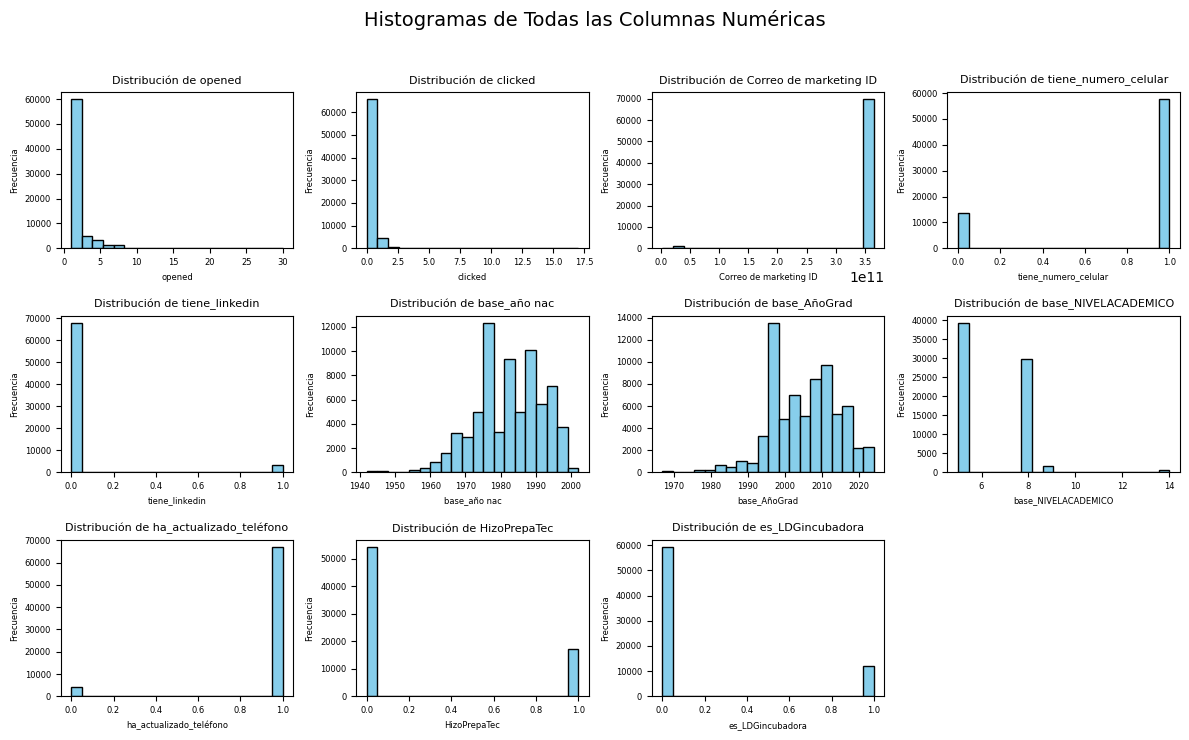

In [860]:
import matplotlib.pyplot as plt
import math

# Filtrar solo las columnas numéricas
df_numerico = df_unidoLDG.select_dtypes(include=['number'])
columnas_numericas = df_numerico.columns

# Configurar el número de filas y columnas en la cuadrícula de subplots
n_columnas = len(columnas_numericas)
n_filas = math.ceil(n_columnas / 4)  # 4 gráficos por fila, ajusta según prefieras

# Configurar el tamaño de la figura (más reducido)
fig, axes = plt.subplots(nrows=n_filas, ncols=4, figsize=(12, n_filas * 2.5))  # Ajusta el figsize aquí

fig.suptitle('Histogramas de Todas las Columnas Numéricas', fontsize=14)  # Reduce la fuente del título principal

# Crear un histograma para cada columna numérica
for ax, col in zip(axes.flatten(), columnas_numericas):
    ax.hist(df_numerico[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}', fontsize=8)  # Reduce aún más el tamaño de la fuente del título
    ax.set_xlabel(col, fontsize=6)  # Reduce aún más el tamaño de la fuente del eje x
    ax.set_ylabel('Frecuencia', fontsize=6)  # Reduce aún más el tamaño de la fuente del eje y
    ax.tick_params(axis='both', which='major', labelsize=6)  # Reduce aún más el tamaño de la fuente de las etiquetas de los ejes

#Eliminar subplots sobrantes en una cuadrículapara mostrar solo los que contienen contenido relevante.
for ax in axes.flatten()[n_columnas:]:
    ax.remove()

# Ajustar el layout (más espacio entre subplots)
plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=0.5, h_pad=1.0)
# Ajusta w_pad y h_pad para controlar el espacio entre subplots
plt.show()

Nos inclinamos a usar el DF de LDG debido a que es el que tenia la informacion mas completa.

#**Avance 2. Ingeniería de características**

**Objetivos**

2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

####**Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. **

>



###**Generación de nuevas características**

#### Eventos

**Participación en tipos de eventos** (participacion_categorias)

**Descripción**:Crea variables indicadoras para cada categoría de evento, reflejando si el egresado ha participado en eventos de tipo Conferencia, Taller, etc

**Justificación**:  Esto ayuda a identificar a los egresados que prefieren ciertos tipos de eventos y pueden ser relevantes para ciertas iniciativas o estrategias

In [861]:
# Crear variables indicadoras para la participación en diferentes categorías de eventos
categorias = pd.get_dummies(df_unidoLDG['evento_Category'], prefix='participacion_categoria')
df_unidoLDG=pd.concat([df_unidoLDG, categorias], axis=1)

In [862]:
display(df_unidoLDG['evento_Category'])

,evento_Category
0,Egresados - Regreso a Casa
1,Egresados - Regreso a Casa
2,Egresados - Regreso a Casa
3,Egresados - Regreso a Casa
4,Egresados - Regreso a Casa
...,...
71180,Egresados - iniciativa de Participación_ Festejos
71181,Egresados - iniciativa de Participación_ Festejos
71182,Egresados - iniciativa de Participación_ Festejos
71183,Egresados - iniciativa de Participación_ Festejos


In [863]:
#Ahora eliminaremos el evento_categoría para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['evento_Category']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

#### Suscripciones

**Antiguedad en suscripción** (antiguedad_suscripcion)

**Descripción**:Variable numérica que mide la antigüedad de la suscripción en días desde la fecha de registro hasta la fecha actual. Una mayor antigüedad podría indicar un mayor interés en los contenidos de los medios institucionales

**Justificación**: Conocer la antigüedad de la suscripción de un egresado puede ayudar a identificar qué tan reciente o comprometido está con los medios de la institución. Esta variable se podría usar para segmentar a los suscriptores en grupos de alto o bajo compromiso con la comunicación institucional

In [864]:
from datetime import datetime
# Asegurarse de que la columna de fechas está en formato datetime
df_unidoLDG['suscrito_FechaRegistro'] = pd.to_datetime(df_unidoLDG['suscrito_FechaRegistro'], errors='coerce')

# Calcular la antigüedad en días desde la fecha de registro hasta la fecha actual
fecha_actual = datetime.now()
df_unidoLDG['antiguedad_suscripcion'] =  (fecha_actual - df_unidoLDG['suscrito_FechaRegistro']).dt.days

In [865]:
#Reemplazar con la media:
df_unidoLDG['antiguedad_suscripcion'].fillna(df_unidoLDG['antiguedad_suscripcion'].mean(), inplace=True)
# Cambiar el tipo de datos de 'antiguedad_suscripcion' a int
df_unidoLDG['antiguedad_suscripcion'] = df_unidoLDG['antiguedad_suscripcion'].astype(int)

In [866]:
display(df_unidoLDG['antiguedad_suscripcion'].head())

,antiguedad_suscripcion
0,113
1,113
2,1479
3,1479
4,1479


In [867]:
#Ahora eliminaremos el suscrito_FechaRegistro para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['suscrito_FechaRegistro']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

#### Demográficos

**Edad** (edad_egresado)

**Descripción**: Variable numérica que calcula la edad actual de los egresados a partir de su año de nacimiento (base_año_nacimiento). Ayuda a segmentar y categorizar a los egresados en diferentes grupos etarios

**Justificación**:Conocer la edad actual de los egresados es crucial para segmentar a la población en función de diferentes etapas de vida y tomar decisiones de acuerdo a sus preferencias y necesidades en función de su edad

In [868]:
#from datetime import datetime

# Calcular la edad actual
# Convertir la columna base_año_nacimiento a formato numérico (int), ignorando errores
df_unidoLDG['base_año nac'] = pd.to_numeric(df_unidoLDG['base_año nac'], errors='coerce')
fecha_actual = datetime.now().year

df_unidoLDG['edad_egresado'] =  fecha_actual - df_unidoLDG['base_año nac']


In [869]:
display(df_unidoLDG['edad_egresado'].head())

,edad_egresado
0,82
1,82
2,82
3,82
4,82


In [870]:
#Ahora eliminaremos el base_año nac para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_año nac']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

**Antiguedad de graduación** (antiguedad_graduacion)

**Descripción**: Variable numérica que mide la antigüedad en años desde la fecha de graduación (base_AñoGrad). Una menor antigüedad puede indicar una conexión más fuerte con el tec

**Justificación**: Conocer la antigüedad desde la graduación permite entender qué tan reciente es el vínculo del egresado con la institución y ayuda a personalizar las campañas según el tiempo transcurrido desde su graduación.

In [871]:
# Convertir la columna base_AñoGrad a formato numérico (int), ignorando errores
df_unidoLDG['base_AñoGrad'] = pd.to_numeric(df_unidoLDG['base_AñoGrad'], errors='coerce')
# Calcular la antigüedad desde la graduación
df_unidoLDG['antiguedad_graduacion'] =   fecha_actual - df_unidoLDG['base_AñoGrad']

In [872]:
display(df_unidoLDG['antiguedad_graduacion'].head())

,antiguedad_graduacion
0,57
1,57
2,46
3,46
4,46


In [873]:
#Ahora eliminaremos el base_AñoGrad para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_AñoGrad']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

#### Campañas de mailing

**Frecuencia en que abre los mails** (nivel engagement)

**Descripción**: Calcula el porcentaje de correos abiertos por el egresado sobre el total de correos recibidos (medido por Correo de marketing ID)

**Justificación**: Identificar la frecuencia con la que el egresado abre los correos electrónicos puede ayudar a segmentar la audiencia para campañas más efectivas. Un egresado que abre muchos correos podría ser considerado como "comprometido" o interesado en el contenido

In [874]:
# Calcular la nivel_engagement (frecuencia de apertura de correos)
df_unidoLDG['nivel_engagement'] =  (df_unidoLDG['opened'] / df_unidoLDG['Correo de marketing ID'].nunique())*100


In [875]:
display(df_unidoLDG['nivel_engagement'].max())

51.724137931034484


###**Discretización o *binning***

La discretización consiste en convertir variables continuas en variables categóricas (bins o grupos). Esto nos será útil para crear rangos (por ejemplo, edad en rangos de jóvenes, adultos, etc.)

**Variable**: Edad Egresado

**Justificación**: Discretizar la edad en rangos nos facilitará la identificación de patrones demográficos y a reducir la variabilidad en modelos que son sensibles a cambios numéricos pequeños

In [876]:
# Discretización de la edad en grupos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir rangos de edad
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']  # Definir etiquetas para cada rango
df_unidoLDG['grupo_edad'] =  pd.cut(df_unidoLDG['edad_egresado'], bins=bins, labels=labels, right=False)


In [877]:
display(df_unidoLDG['grupo_edad'].head())

,grupo_edad
0,65+
1,65+
2,65+
3,65+
4,65+


In [878]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoLDG['grupo_edad'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


,count
grupo_edad,
35-44,25865
45-54,21546
25-34,16729
55-64,6180
65+,811
<25,54


**Es importante analizar por qué el grupo de menores de 25 años (<25) en el resultado del binning numérico es tan reducido, a pesar de que la mayoría de los egresados suelen graduarse antes de esta edad. Este hecho resulta especialmente relevante considerando que en el DF se incluyeron las graduaciones de diciembre del 2023.**

**Variable**: antiguedad_graduacion

**Justificación**: Dividir la antigüedad en grupos (por ejemplo, reciente, intermedio, antiguo) podría ayudar a identificar patrones en el comportamiento de los egresados según su tiempo de egreso

In [879]:
# Ajustar los bins para incluir cualquier valor más allá de 50 años
antiguedad_bins = [0, 5, 10, 20, 30, 50, float('inf')]  # Agregar un bin superior
antiguedad_labels = ['0-5 años', '6-10 años', '11-20 años', '21-30 años', '31-50 años', 'Más de 50 años']

# Aplicar pd.cut() con los bins ajustados
df_unidoLDG['grupo_antiguedad_graduacion'] = pd.cut(df_unidoLDG['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)


In [880]:
display(df_unidoLDG['grupo_antiguedad_graduacion'].head())

,grupo_antiguedad_graduacion
0,Más de 50 años
1,Más de 50 años
2,31-50 años
3,31-50 años
4,31-50 años


**Variable**: open & clic

**Justificación**: Los usuarios pueden ser segmentados en rangos porcentuales de apertura según cuántas veces abren los correos. Esto es útil para personalizar las campañas de marketing

In [881]:
# Discretización de la frecuencia de apertura de correos
apertura_bins = [0, 10, 20, 30, 40, 50, 60]
apertura_labels = ['0-10% apertura', '10-20% aperturas', '20-30% aperturas', '30-40% aperturas', '40-50% aperturas', '>50% aperturas']

# Aplicar discretización en los DataFrames
df_unidoLDG['rangos_engagement'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

df_unidoLDG['frecuencia_apertura_correos'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

In [882]:
display(df_unidoLDG['rangos_engagement'].head())

,rangos_engagement
0,0-10% apertura
1,0-10% apertura
2,0-10% apertura
3,0-10% apertura
4,0-10% apertura


In [883]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoLDG['rangos_engagement'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

,count
rangos_engagement,
0-10% apertura,68182
10-20% aperturas,2762
20-30% aperturas,182
>50% aperturas,26
30-40% aperturas,25
40-50% aperturas,8


In [884]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoLDG['evento_attendeeStatus'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

,count
evento_attendeeStatus,
Registered,61288
Accepted,8958
Cancelled,879
Invited,36
Sin Estado,24


In [885]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unidoLDG.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unidoLDG[col].nunique()} categorías")

'rol: 20 categorías'

'categoria_dominio_correo: 3 categorías'

'Campaña ID: 17 categorías'

'info_FECHA_MAIL_ACTIVO: 521 categorías'

'info_FECHA_ACTIVO: 1332 categorías'

'info_FECHA_ACTIVO_NUM_CELULAR: 649 categorías'

'info_ESTADOCIVIL: 7 categorías'

'base_SEXO: 2 categorías'

'base_NACIONALIDAD: 16 categorías'

'base_ESTADONACIMIENTO: 55 categorías'

'base_exatec personalizado: 3 categorías'

'base_ESTADO_RESIDENCIA: 54 categorías'

'base_PAIS_RESIDENCIA: 18 categorías'

'base_Tipo Escuela: 6 categorías'

'base_SIGLASDELPROGRAMA: 180 categorías'

'base_IDCAMPUS: 35 categorías'

'base_campusoperación: 32 categorías'

'base_GIROEMPRESA: 67 categorías'

'base_TIPOEMPRESA: 4 categorías'

'base_AREAORGANIZACIONAL: 30 categorías'

'base_ESTATUSEMPLEO: 2 categorías'

'giveaway_fecha: 1 categorías'

'evento_EventName: 639 categorías'

'evento_Campus: 37 categorías'

'evento_attendeeStatus: 5 categorías'

###**Codificación (ordinal, one hot,…)**

**Variable**: base_SEXO, base_NIVELACADEMICO

**Justificación**: La codificación adecuada garantiza que los modelos de machine learning puedan procesar y aprender patrones de variables categóricas, sin distorsionar las relaciones entre categorías

**Nota: base_SEXO ya se había hecho onehot anteriormente**

In [886]:
# Encontrar los valores únicos de la columna 'base_NIVELACADEMICO'
unique_values_nivel_academico = df_unidoLDG['base_NIVELACADEMICO'].unique()

# Imprimir los valores únicos
print(unique_values_nivel_academico)

[ 5  8  9 14]


In [887]:

# Crear un diccionario para mapear los valores originales con el nuevo orden jerárquico
nivel_academico_ordinal = {
    5: 1,  # Carrera
    8: 2,  # Maestría
    9: 3,  # Doctorado
    14: 4  # Postdoctorado
}

# Reemplazar los valores de 'base_NIVELACADEMICO' por los valores ordinales
df_unidoLDG['base_NIVELACADEMICO_ORD'] = df_unidoLDG['base_NIVELACADEMICO'].map(nivel_academico_ordinal)

# Eliminar la columna original 'base_NIVELACADEMICO'
df_unidoLDG.drop(columns=['base_NIVELACADEMICO'], inplace=True)


In [888]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding para variables categóricas
# se elimina base_NIVELACADEMICO
onehot_vars = ['categoria_dominio_correo', 'base_Tipo Escuela', 'base_TIPOEMPRESA',  'base_SEXO', 'base_ESTATUSEMPLEO', 'evento_CheckedIn',	'evento_attendeeStatus',]  # Variables categóricas

# Inicializar OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' elimina una columna para evitar multicolinealidad

# Realizar el One-Hot Encoding en df_unido
onehot_encoded = onehot_encoder.fit_transform(df_unidoLDG[onehot_vars])

# Convertir el resultado a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_vars))

# Concatenar con el DataFrame original (sin las columnas originales categóricas)
df_unidoLDG = pd.concat([df_unidoLDG.drop(columns=onehot_vars), onehot_df], axis=1)


La variable Rol con TEC puede tener los siguientes valores:

* EXATEC
* Colaborador
* Donante
* Consejero
* Padre de familia
* Alumno

Pero en esa variable si son más de 1, se guarda así
"Colaborador; Donante; Exatec"

Por ello se deben separar y hacer un one hot encoding

In [889]:
# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoLDG['rol'].str.join('|').str.get_dummies()
df_unidoLDG = pd.concat([df_unidoLDG, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

df_unidoLDG.drop(columns=['rol'], inplace=True)

Se usará un Frequent Categories Encoding para solo mantener las 15 más frecuentes las demás se enviarán a "Otros" para las columnas:
* base_PAIS_RESIDENCIA
* base_ESTADO_RESIDENCIA
* base_NACIONALIDAD
* base_ESTADONACIMIENTO

In [890]:
# Lista de columnas en las que deseas aplicar el procesamiento
columnas_categoricas = [
    'base_PAIS_RESIDENCIA',
    'base_ESTADO_RESIDENCIA',
    'base_NACIONALIDAD',
    'base_ESTADONACIMIENTO',
    'evento_Campus',
    'base_campusoperación',
]

# Definir el número de valores más comunes que quieres conservar
n_top = 15  # Puedes ajustar este valor según lo necesario

# Procesar cada columna de la lista
for col in columnas_categoricas:
    # Obtener los valores más frecuentes de la columna
    estado_counts = df_unidoLDG[col].value_counts()
    top_estados = estado_counts.nlargest(n_top).index  # Seleccionar los n valores más comunes

    # Crear una nueva columna con los valores menos frecuentes agrupados como 'Otros'
    nueva_col = f"{col}_convertido"  # Nombre de la columna con los valores convertidos
    df_unidoLDG[nueva_col] = df_unidoLDG[col].apply(lambda x: x if x in top_estados else 'Otros')

    # Aplicar One-Hot Encoding a la columna nueva y eliminar la columna original
    df_unidoLDG = pd.get_dummies(df_unidoLDG, columns=[nueva_col], drop_first=True)

    # Eliminar la columna original
    df_unidoLDG.drop(columns=[col], inplace=True)


In [891]:
# Cambiar automáticamente a int solo en columnas que ahora solo contienen 0 y 1
for col in df_unidoLDG.columns:
    if df_unidoLDG[col].dtype == 'float64' and set(df_unidoLDG[col].unique()).issubset({0, 1}):
        df_unidoLDG[col] = df_unidoLDG[col].astype(int)

# Verificar el resultado
print(df_unidoLDG.dtypes)

opened                                               int64
clicked                                              int64
Correo de marketing ID                             float64
Campaña ID                                          object
info_FECHA_MAIL_ACTIVO                              object
                                                    ...   
base_campusoperación_convertido_San Luis Potosí       bool
base_campusoperación_convertido_Santa Fe              bool
base_campusoperación_convertido_Sonora Norte          bool
base_campusoperación_convertido_Tampico               bool
base_campusoperación_convertido_Toluca                bool
Length: 165, dtype: object


###**Escalamiento (normalización, estandarización, min – max,…)**

In [892]:


# Convertir a NaN cualquier valor que sea una cadena vacía, espacio en blanco o caracteres invisibles en todo el DataFrame
df_unidoLDG = df_unidoLDG.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

# Contar nuevamente los valores NaN en cada columna del DataFrame
nan_por_columna = df_unidoLDG.isna().sum()

# Mostrar los resultados
print("Cantidad de NaN por columna:")
print(nan_por_columna)


Cantidad de NaN por columna:
opened                                             0
clicked                                            0
Correo de marketing ID                             0
Campaña ID                                         0
info_FECHA_MAIL_ACTIVO                             0
                                                  ..
base_campusoperación_convertido_San Luis Potosí    0
base_campusoperación_convertido_Santa Fe           0
base_campusoperación_convertido_Sonora Norte       0
base_campusoperación_convertido_Tampico            0
base_campusoperación_convertido_Toluca             0
Length: 165, dtype: int64


**Variables**: opened, clicked

**Ténica**: Standard Scaling
Ventajas:
Reduce la influencia de variables con varianza elevada, asegurando que todas las variables contribuyan por igual.

**Justificación**:
Para las variables que presentan una amplia dispersión de valores, como opened y clicked, estandarizarlas ayuda a evitar que los valores altos dominen el modelo

**Justificación general:**
El escalamiento se elige basándose en el tipo de variable y su distribución:

Variables con rango acotado: Aplicamos *Min-Max Scaling* para llevarlas a [0, 1], ya que no necesitan centrado y es importante preservar las relaciones
relativas entre los valores.

Variables con mucha varianza: Aplicamos *Standard Scaling* para asegurar que no afecten de manera desproporcionada a los modelos.


In [893]:
#Importar las librerías necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#variables a escalar
variables_escalar = [
    'opened', 'clicked'
]

#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoLDG.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoLDG[variables_existentes] = minmax_scaler.fit_transform(df_unidoLDG[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoLDG[variables_existentes] = standard_scaler.fit_transform(df_unidoLDG[variables_existentes])


In [894]:
from sklearn.preprocessing import PowerTransformer

# Transformación Logarítmica para variables sesgadas #total_eventos_asistidos
variables_log = ['nivel_engagement']
for var in variables_log:
    df_unidoLDG[var + '_log'] = np.log1p(df_unidoLDG[var])

# Aplicación de Yeo-Johnson para variables con valores negativos o complejos
pt = PowerTransformer(method='yeo-johnson')
df_unidoLDG['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoLDG[['edad_egresado']])

# Normalización Min-Max para mantener todas las variables en el mismo rango
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
variables_minmax = ['opened', 'clicked']
df_unidoLDG[variables_minmax] = scaler.fit_transform(df_unidoLDG[variables_minmax])

Se aplicó una transformación logarítmica a las variables con distribuciones sesgadas para reducir el efecto de valores extremos. Además, la transformación Yeo-Johnson fue útil para variables con valores negativos, lo que permite que el modelo las interprete correctamente. Finalmente, se utilizó Min-Max Scaling para asegurar que las variables mantengan el mismo rango, evitando que alguna característica domine el análisis debido a su magnitud.


In [895]:
display(df_unidoLDG['clicked'].head())

,clicked
0,0.058824
1,0.058824
2,0.000000
3,0.000000
4,0.000000


## **Conclusiones**

Se utilizó la codificación One-Hot para la variable ‘base_Tipo Escuela’, debido a que esta variable no tiene un orden natural. Transformarla en variables binarias asegura que cada categoría sea tratada como independiente.

Por otro lado, aplicamos escalado Min-Max a las variables de apertura y cliks de correos electrónicos. Esto garantiza que todos los valores estén en el mismo rango [0,1], lo cual es crucial para mejorar la eficiencia en modelos basados en distancia.

##ARREGLAR LA SELECCIÓN DEL MÉTODO
Finalmente, empleamos PCA para reducir la dimensionalidad del conjunto, eliminando redundancias y acelerando los tiempos de entrenamiento, sin perder información relevante.

El proceso de preparación de datos en esta fase fue alineado con la metodología CRISP-ML, asegurando que los datos sean precisos, relevantes y estén en el formato adecuado para los modelos de aprendizaje automático.

Primero, se identificaron y manejaron valores atípicos y se trató la ausencia de datos, garantizando la calidad del dataset. Luego, se crearon nuevas características relevantes que fortalecen el análisis, como la antigüedad desde la graduación y la frecuencia de participación en eventos.

Además, se aplicaron transformaciones y escalado para asegurar la correcta interpretación de los algoritmos y mejorar la convergencia. Finalmente, a través de técnicas de selección de características (análisis factorial), se optimizó el conjunto de datos para reducir la complejidad del modelo, maximizando así la eficiencia del proceso de modelado.



##**Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar**

##Umbral de varianza

**Justificación:** El umbral de varianza elimina variables con baja variabilidad, ya que estas aportan poco o nada al modelo.

**Decisión:** Se usó un umbral de 0.01 para eliminar columnas cuya varianza es menor al 1%.

**Resultado:**Reducción del ruido en los datos y simplificación del modelo sin pérdida significativa de información.

In [896]:
from sklearn.feature_selection import VarianceThreshold

# Umbral para mantener variables con más del 1% de varianza
selector = VarianceThreshold(threshold=0.01)
X_var_threshold = selector.fit_transform(df_unidoLDG.select_dtypes(include=['number']))

# Obtener las columnas retenidas
columns_retained = df_unidoLDG.select_dtypes(include=['number']).columns[selector.get_support()]
display("Columnas retenidas por umbral de varianza:", columns_retained)


'Columnas retenidas por umbral de varianza:'

Index(['Correo de marketing ID', 'tiene_numero_celular', 'tiene_linkedin',
       'ha_actualizado_teléfono', 'HizoPrepaTec', 'es_LDGincubadora',
       'antiguedad_suscripcion', 'edad_egresado', 'antiguedad_graduacion',
       'nivel_engagement', 'base_NIVELACADEMICO_ORD',
       'categoria_dominio_correo_Genérico', 'categoria_dominio_correo_Otros',
       'base_Tipo Escuela_Gobierno y Ciencias Sociales',
       'base_Tipo Escuela_Humanidades y Educación',
       'base_Tipo Escuela_Ingeniería y Ciencias', 'base_Tipo Escuela_Negocios',
       'base_TIPOEMPRESA_Mexicana', 'base_TIPOEMPRESA_Transnacional en México',
       'base_SEXO_Masculino', 'base_ESTATUSEMPLEO_I', 'evento_CheckedIn_True',
       'evento_attendeeStatus_Cancelled', 'evento_attendeeStatus_Registered',
       ' Colaborador', ' Donante', ' Donante Prospecto', ' Exatec', 'Alumno',
       'Colaborador', 'Donante', 'Donante Prospecto', 'Exatec',
       'nivel_engagement_log', 'edad_egresado_yeojohnson'],
      dtype='object'

Con la información anterior se responden preguntas como

¿Las columnas retenidas tienen sentido desde un punto de vista del negocio?

**Sí vemos que las variables mostradas generan valor al negocio, excepto el TipoEmpresanan por ello decidimos eliminarla**

¿Existen columnas que aún sean redundantes o que puedan ser combinadas con otras variables?

##Correlación entre las variables retenidas

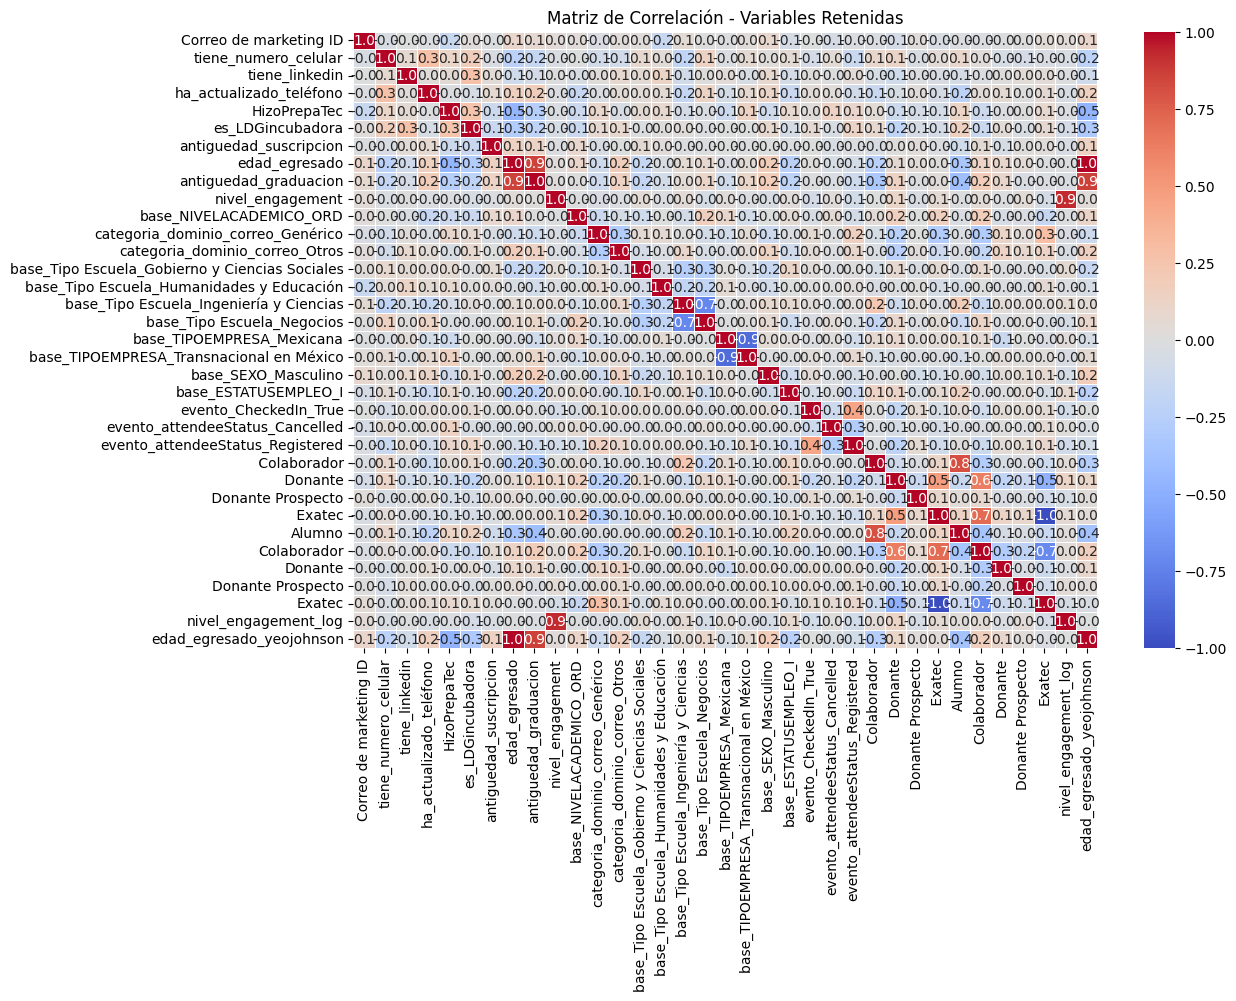

In [897]:
# Verificar las columnas que sí están en el DataFrame
columns_retained_valid = [col for col in columns_retained if col in df_unidoLDG.columns]

# Calcular la matriz de correlación con las columnas válidas
correlation_matrix = df_unidoLDG[columns_retained_valid].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Retenidas')
plt.show()


**Análisis del Mapa de Correlación**

Correlación Fuerte (cercana a ±1):

**IA_ID con base_año_nacimiento (-0.77):** Esto indica una fuerte correlación negativa. A medida que aumenta el año de nacimiento (egresados más jóvenes), el IA_ID decrece. Lo que podemos asumir que el ID fue ordenado por matrícula en orden descendente

Correlaciones Moderadas:

**antiguedad_graduacion con edad_egresado (0.87):** Sugiere que a mayor edad del egresado, mayor es la antigüedad de su graduación. Este tipo de correlación es esperable y valida los datos.

**nivel_engagement con opened (0.30):** Hay una correlación positiva moderada, lo que indica que un mayor engagement está vinculado a más correos abiertos, aunque no es determinante.


**Correlaciones Débiles (cercanas a 0):**
Muchas de las variables tienen correlaciones muy bajas entre sí, indicando que no están relacionadas de forma significativa. Esto es positivo porque permite mantener varias variables sin riesgo de redundancia.

**Acciones:**

**edad_egresado con base_año_nacimiento (-1.00):** Esta es una correlación perfecta negativa, lo que confirma la relación directa entre la edad y el año de nacimiento, por ello se eliminará pues la edad_egresado se calculó con base_año_nacimiento

**base_AñoGrad con antiguedad_graduacion (-0.77):** Esto es lógico, ya que cuanto más antiguo sea el año de graduación, mayor será la antigüedad en la graduación, se eliminará el base_añograd ya que genera redundancia

##Análisis para seleccionar las variables de mayor importancia

**Método 1: Chi-cuadrado**

**Uso:** Ideal para variables categóricas independientes que se utilizan para predecir una variable objetivo categórica.

**Ventajas:**

* Fácil de aplicar.
* Útil para preseleccionar variables categóricas.

**Limitación:**
* Solo funciona para datos categóricos, no aplicable a datos numéricos.

**Nuestro caso:** Este método no sería el más adecuado ya que nuestro enfoque se basa en variables numéricas o el objetivo no es categórico.



**Método 2: ANOVA (Análisis de Varianza)**

**Uso:**: Útil para evaluar si las medias de una variable numérica difieren significativamente entre diferentes categorías de una variable categórica.

**Ventajas:**
Ayuda a determinar qué variables categóricas influyen significativamente en las variables numéricas.

**Limitación:**
Solo permite analizar una variable numérica dependiente a la vez.

**Nuestro caso:** Podría ser útil al determinar variables categóricas (como nivel académico o tipo de empresa) influyen en una variable numérica como engagement o edad del egresado. Sin embargo, tiene limitaciones ya que nuestras variables son de mayor complejista



**Método 3: PCA (Análisis de Componentes Principales)**

**Uso:**
Reducción de dimensionalidad, transforma las variables originales en componentes principales no correlacionadas.
Ayuda a identificar combinaciones lineales de variables que explican la mayor variabilidad del conjunto de datos.

**Ventajas:**
* Muy útil ya que tenemos muchas variables numéricas con posible colinealidad.
* Facilita la interpretación y simplifica los modelos.

**Limitación:**
* Las componentes principales pueden perder interpretabilidad, ya que representan combinaciones de variables.
* No se puede aplicar directamente a variables categóricas sin preprocesamiento

**Nuestro caso:**
Dado que tenemos varias variables numéricas y podríamos enfrentar problemas de multicolinealidad, PCA lo vemos como un enfoque muy útil para reducir la complejidad y mantener la información relevante.



**Método 4: Análisis Factorial (FA)**
**Uso:**
Similar a PCA, pero se enfoca en descubrir los factores latentes entre las variables.

**Ventajas:**
* Útil al sospechar que varias variables miden aspectos similares de un fenómeno.
* Permite generar factores latentes que faciliten la interpretación del modelo.

**Limitación:**
* Es más interpretativo y subjetivo que el PCA.
* Requiere que las variables tengan cierta estructura de correlación.

**Nuestro caso:**
La matriz de correlación no representa que las variables posean aspectos diferentes del comportamiento de los egresados (por ejemplo, engagement, tipo de empresa, y nivel académico),


**Conclusión: Mejor Método para nuestro caso**

**PCA (Análisis de Componentes Principales)**

Es la opción más adecuada para nuestra situación, debido a los siguientes factores:
* **Colinealidad:** La matriz de correlación muestra algunas correlaciones moderadas y fuertes que podrían afectar los modelos predictivos si no se tratan.
* **Variables Numéricas:** Muchas de las variables importantes son numéricas (opened, clicked, engagement, edad, antigüedad).
* **Reducción de dimensionalidad:** PCA nos permitirá simplificar el conjunto de datos manteniendo la mayor parte de la información relevante, lo que facilitará la construcción de modelos más eficientes.

In [898]:
 df_unidoLDG['es_LDGincubadora'].unique()
 # Reemplazar los NaN por "0" en todo el DataFrame
 df_unidoLDG['es_LDGincubadora'].fillna(0, inplace=True)

In [899]:
# Seleccionar solo las columnas numéricas
df_numerico = df_unidoLDG.select_dtypes(include='number')

# Mostrar las primeras filas de los datos numéricos
print(df_numerico.head())


   opened   clicked  Correo de marketing ID  tiene_numero_celular  \
0     0.0  0.058824            3.622020e+11                     0   
1     0.0  0.058824            3.622020e+11                     0   
2     0.0  0.000000            3.633040e+11                     1   
3     0.0  0.000000            3.633040e+11                     1   
4     0.0  0.000000            3.633040e+11                     1   

   tiene_linkedin  ha_actualizado_teléfono  HizoPrepaTec  es_LDGincubadora  \
0               0                        1             0                 0   
1               0                        1             0                 0   
2               0                        1             0                 0   
3               0                        1             0                 0   
4               0                        1             0                 0   

   antiguedad_suscripcion  edad_egresado  antiguedad_graduacion  \
0                     113             82         

In [900]:
# Asegurarse de que las columnas numéricas definidas existan en el DataFrame
columnas_numéricas = ['opened', 'clicked', 'correo de marketing ID', 'tiene_numero_celular',
                      'tiene_linkedin', 'HizoPrepaTec', 'antiguedad_suscripcion',
                      'edad_egresado', 'antiguedad_graduacion', 'nivel_engagement']

# Filtrar solo las columnas numéricas que existen en el DataFrame
columns_available = [col for col in columnas_numéricas if col in df_unidoLDG.columns]

In [901]:
import pandas as pd

def check_for_nan(df):
  """
  Checks for NaN values in a pandas DataFrame.

  Args:
    df: The pandas DataFrame to check.

  Returns:
    A boolean value indicating whether the DataFrame contains NaN values, and a DataFrame with the count of NaN values per column.
  """
  has_nan = df.isnull().values.any()
  nan_counts = df.isnull().sum()
  return has_nan, nan_counts

# Assuming 'df_unidoLDG' is your DataFrame
has_nan, nan_counts = check_for_nan(df_unidoLDG)

if has_nan:
  print("The DataFrame contains NaN values.")
  print("NaN count per column:")
  print(nan_counts)
else:
  print("The DataFrame does not contain NaN values.")

The DataFrame contains NaN values.
NaN count per column:
opened                                          0
clicked                                         0
Correo de marketing ID                          0
Campaña ID                                      0
info_FECHA_MAIL_ACTIVO                          0
                                               ..
base_campusoperación_convertido_Sonora Norte    0
base_campusoperación_convertido_Tampico         0
base_campusoperación_convertido_Toluca          0
nivel_engagement_log                            0
edad_egresado_yeojohnson                        0
Length: 167, dtype: int64


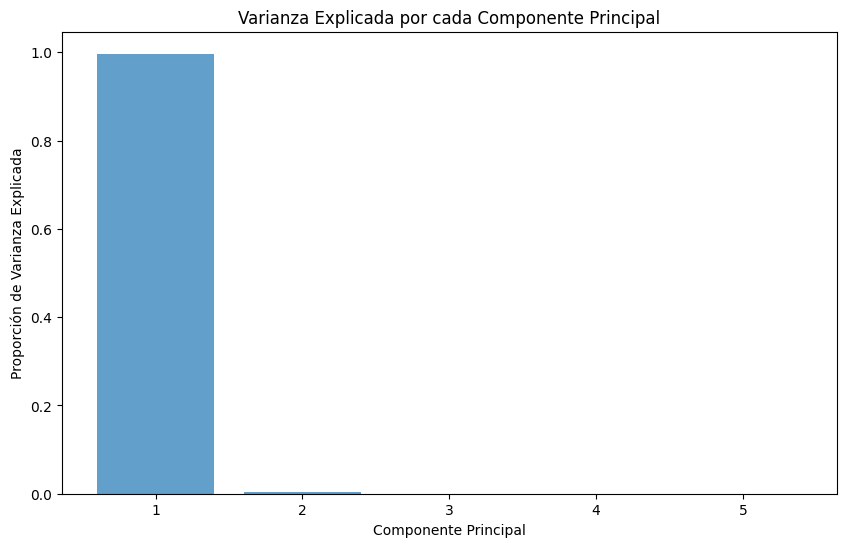

,PC1,PC2,PC3,PC4,PC5
0,-1316.264348,65.696567,1.245754,-2.088734,-0.506498
1,-1316.264348,65.696567,1.245754,-2.088734,-0.506498
2,49.636705,47.581300,-6.677013,-2.299676,0.480996
3,49.636705,47.581300,-6.677013,-2.299676,0.480996
4,49.636705,47.581300,-6.677013,-2.299676,0.480996


In [902]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filtrar las variables numéricas seleccionadas del DataFrame
X = df_unidoLDG[columns_available].select_dtypes(include=['number'])

# Asegurarse de que no haya NaNs o infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar PCA y ajustar los datos
pca = PCA(n_components=min(5, X.shape[1]))  # Ajustar a menos componentes si hay pocas columnas
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

# Crear un DataFrame con las nuevas componentes principales
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Mostrar las primeras filas del DataFrame resultante
display(df_pca.head())


In [903]:
 df_unidoLDG['es_LDGincubadora'].unique()

array([0, 1])

##JUSTIFICAR POR QUÉ NO SE USÓ PCA

Análisis factorial

In [904]:
!pip install factor_analyzer

In [905]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer


# Filtrar solo las variables numéricas del DataFrame
X_numerico = df_unidoLDG[columns_available].select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = X_numerico.corr().abs()

# Identificar pares de variables altamente correlacionadas
high_corr_var = np.where(correlation_matrix > 0.95)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y]

#Eliminar una variable de cada par altamente correlacionado
variables_a_eliminar = [var[1] for var in high_corr_pairs]
X_reducido = X_numerico.drop(columns=variables_a_eliminar)

#Manejar NaNs e infinitos en los datos
X_reducido = X_reducido.replace([np.inf, -np.inf], np.nan)  # Reemplazar inf por NaN
X_reducido = X_reducido.dropna()  # Eliminar filas con NaNs

# Asegurarse de que no haya valores faltantes o infinitos
if np.any(np.isnan(X_reducido)) or np.any(np.isinf(X_reducido)):
    print("Error: Todavía existen NaNs o infinitos en los datos.")
else:
    #Escalar las variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reducido)

    #Aplicar el análisis factorial con 5 factores y rotación varimax
    fa = FactorAnalyzer(n_factors=5, rotation='varimax')
    fa.fit(X_scaled)

    #Crear un DataFrame con las cargas factoriales y mostrarlo
    cargas_factoriales = pd.DataFrame(
        fa.loadings_,
        index=X_reducido.columns,
        columns=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])]
    )

    display(cargas_factoriales)

    #Obtener y mostrar la varianza explicada por cada factor
    varianza_explicada = pd.DataFrame({
        'Varianza Explicada': fa.get_factor_variance()[1],
        'Varianza Acumulada': fa.get_factor_variance()[2]
    }, index=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])])

    display("Varianza explicada por cada factor:")
    display(varianza_explicada)


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
clicked,0.062385,-0.020059,-0.048574,0.199469,0.081830
tiene_numero_celular,-0.077714,0.061323,-0.077635,-0.425538,0.181415
tiene_linkedin,-0.045434,0.037457,0.050723,-0.008405,0.344508
HizoPrepaTec,-0.182003,0.599252,-0.115727,-0.078466,0.067958
antiguedad_suscripcion,0.076121,-0.089709,0.532163,-0.010685,0.070905
edad_egresado,0.818776,-0.447463,0.088311,0.248673,-0.131637
antiguedad_graduacion,0.918075,-0.105357,0.112052,0.165658,-0.067244


'Varianza explicada por cada factor:'

,Varianza Explicada,Varianza Acumulada
Factor_1,0.223453,0.223453
Factor_2,0.083434,0.306887
Factor_3,0.046844,0.353731
Factor_4,0.045213,0.398944
Factor_5,0.027113,0.426057


Durante la preparación de los datos, se aplicaron técnicas de ingeniería de características para asegurar la calidad del modelo. La selección de variables mediante umbral de varianza y análisis factorial simplificó el conjunto de datos. La normalización y transformación de datos aseguraron una mejor convergencia de los algoritmos. Estas decisiones alinean nuestra preparación de datos con la metodología CRISP-ML, asegurando que los datos estén listos para la fase de modelado y que respondan a las necesidades estratégicas del negocio.

In [906]:
# Forzar la recolección de basura
gc.collect()

89583

### Balanceo de clases

In [907]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

,0
base_IDCAMPUS,1.015663
base_GIROEMPRESA,0.778254


In [908]:
# Imputar la columna 'grupo_edad' con la moda
df_unidoLDG['grupo_edad'].fillna(df_unidoLDG['grupo_edad'].mode()[0], inplace=True)

# Imputar la columna 'grupo_antiguedad_graduacion' con la moda
df_unidoLDG['grupo_antiguedad_graduacion'].fillna(df_unidoLDG['grupo_antiguedad_graduacion'].mode()[0], inplace=True)

# Verificar si aún quedan NaNs
porcentaje_nan_final = df_unidoLDG.isna().mean() * 100
columnas_con_nan_final = porcentaje_nan_final[porcentaje_nan_final > 0]

# Mostrar las columnas con valores NaN después de la segunda imputación
display("Columnas con valores NaN después de la segunda imputación:")
display(columnas_con_nan_final)


'Columnas con valores NaN después de la segunda imputación:'

,0
base_IDCAMPUS,1.015663
base_GIROEMPRESA,0.778254


In [909]:


df_unidoLDG['antiguedad_suscripcion'].fillna(df_unidoLDG['antiguedad_suscripcion'].mean(), inplace=True)

# Verificar si aún quedan NaNs
porcentaje_nan_final = df_unidoLDG.isna().mean() * 100
columnas_con_nan_final = porcentaje_nan_final[porcentaje_nan_final > 0]

# Mostrar las columnas con valores NaN después de la segunda imputación
display("Columnas con valores NaN después de la segunda imputación:")
display(columnas_con_nan_final)


'Columnas con valores NaN después de la segunda imputación:'

,0
base_IDCAMPUS,1.015663
base_GIROEMPRESA,0.778254


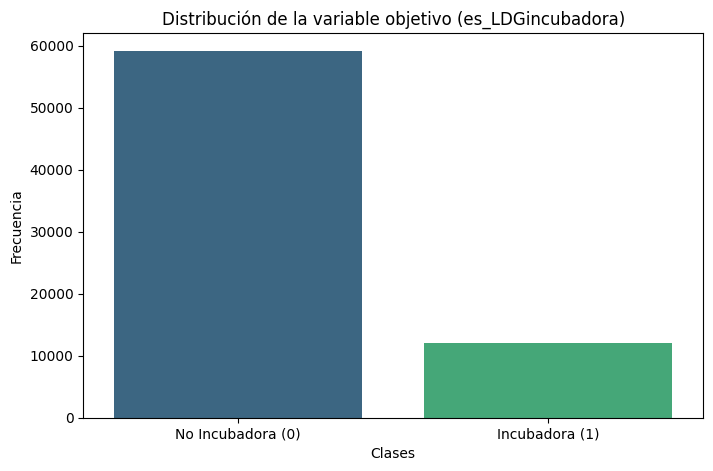

Proporción de clase 0 (No Incubadora): 83.06%
Proporción de clase 1 (Incubadora): 16.94%


In [910]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis estadístico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción (con manejo de clases faltantes)
total = sum(class_counts)

# Proporción de clase 0
if 0 in class_counts.index:
    proporcion_clase_0 = class_counts[0] / total * 100
    print(f"Proporción de clase 0 (No Incubadora): {proporcion_clase_0:.2f}%")
else:
    print("Clase 0 (No Incubadora) no está presente en los datos.")

# Proporción de clase 1
if 1 in class_counts.index:
    proporcion_clase_1 = class_counts[1] / total * 100
    print(f"Proporción de clase 1 (Incubadora): {proporcion_clase_1:.2f}%")
else:
    print("Clase 1 (Incubadora) no está presente en los datos.")

In [911]:
from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoLDG.drop('es_LDGincubadora', axis=1)
y = df_unidoLDG['es_LDGincubadora']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoLDG = X_resampled.copy()
df_resampled_unidoLDG['es_LDGincubadora'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_unidoLDG['es_LDGincubadora'].value_counts())

'Distribución de clases después del submuestreo:'

,count
es_LDGincubadora,
0,12059
1,12059


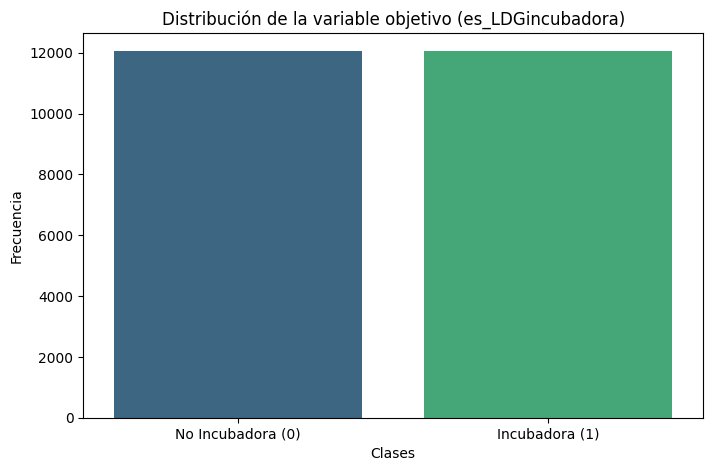

'Proporción de clase 0 (No Incubadora): 50.00%'

'Proporción de clase 1 (Incubadora): 50.00%'

In [912]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [913]:
df_unidoLDG = df_resampled_unidoLDG

Guardamos el CSV nuevo para avance 3

In [914]:
# Guardar el DataFrame df_unido en un archivo CSV

df_unidoLDG.to_csv(folder_path + 'bases/df_unido_limpioLGD_avance2.csv', index=False)

In [915]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG.head())

,opened,clicked,Correo de marketing ID,Campaña ID,info_FECHA_MAIL_ACTIVO,info_FECHA_ACTIVO,info_FECHA_ACTIVO_NUM_CELULAR,info_ESTADOCIVIL,tiene_numero_celular,tiene_linkedin,base_exatec personalizado,base_SIGLASDELPROGRAMA,base_IDCAMPUS,base_GIROEMPRESA,base_AREAORGANIZACIONAL,ha_actualizado_teléfono,HizoPrepaTec,giveaway_fecha,evento_EventName,participacion_categoria_Egresados - Meet and Greet de Asociaciones,participacion_categoria_Egresados - Regreso a Casa,participacion_categoria_Egresados - Voluntariado,"participacion_categoria_Egresados - iniciativa de Participación_ Charlas, pláticas o conferencias",participacion_categoria_Egresados - iniciativa de Participación_ Culturales o Sociales,participacion_categoria_Egresados - iniciativa de Participación_ Deportivos,participacion_categoria_Egresados - iniciativa de Participación_ Evento con causa,participacion_categoria_Egresados - iniciativa de Participación_ Festejos,participacion_categoria_Egresados - iniciativa de Participación_ Networking,participacion_categoria_Egresados - iniciativa de Participación_ Premios y reconocimientos,participacion_categoria_Egresados - iniciativa de Participación_ Visitas EXATEC,participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG,participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores,participacion_categoria_Egresados -Evento de Asociaciones,antiguedad_suscripcion,edad_egresado,antiguedad_graduacion,nivel_engagement,grupo_edad,grupo_antiguedad_graduacion,rangos_engagement,frecuencia_apertura_correos,base_NIVELACADEMICO_ORD,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_TIPOEMPRESA_Franquicia extranjera,base_TIPOEMPRESA_Mexicana,base_TIPOEMPRESA_Transnacional en México,base_SEXO_Masculino,base_ESTATUSEMPLEO_I,evento_CheckedIn_True,evento_attendeeStatus_Cancelled,evento_attendeeStatus_Invited,evento_attendeeStatus_Registered,evento_attendeeStatus_Sin Estado,Colaborador,Consejero,Donante,Donante Prospecto,Ex Consejero,Exatec,Líder OSF,Líder de Campaña,Prospecto,Alumno,Colaborador,Consejero,Donante,Donante Prospecto,Exatec,base_PAIS_RESIDENCIA_convertido_Canada,base_PAIS_RESIDENCIA_convertido_Chile,base_PAIS_RESIDENCIA_convertido_Ecuador,base_PAIS_RESIDENCIA_convertido_El Salvador,base_PAIS_RESIDENCIA_convertido_Guatemala,base_PAIS_RESIDENCIA_convertido_Luxembourg,base_PAIS_RESIDENCIA_convertido_Mexico,base_PAIS_RESIDENCIA_convertido_Netherlands,base_PAIS_RESIDENCIA_convertido_Nicaragua,base_PAIS_RESIDENCIA_convertido_Otros,base_PAIS_RESIDENCIA_convertido_Peru,base_PAIS_RESIDENCIA_convertido_Spain,base_PAIS_RESIDENCIA_convertido_Switzerland,base_PAIS_RESIDENCIA_convertido_United Kingdom,base_PAIS_RESIDENCIA_convertido_United States,base_ESTADO_RESIDENCIA_convertido_California,base_ESTADO_RESIDENCIA_convertido_Edomex,base_ESTADO_RESIDENCIA_convertido_Indefinido,base_ESTADO_RESIDENCIA_convertido_Nuevo León,base_ESTADO_RESIDENCIA_convertido_Otros,base_ESTADO_RESIDENCIA_convertido_Querétaro,base_ESTADO_RESIDENCIA_convertido_San Luis Potosí,base_ESTADO_RESIDENCIA_convertido_chihuahua,base_ESTADO_RESIDENCIA_convertido_ciudad de mexico,base_ESTADO_RESIDENCIA_convertido_coahuila,base_ESTADO_RESIDENCIA_convertido_guanajuato,base_ESTADO_RESIDENCIA_convertido_hidalgo,base_ESTADO_RESIDENCIA_convertido_jalisco,base_ESTADO_RESIDENCIA_convertido_sonora,base_ESTADO_RESIDENCIA_convertido_tamaulipas,base_NACIONALIDAD_convertido_Boliviana,base_NACIONALIDAD_convertido_Colombiana,base_NACIONALIDAD_convertido_Costarricense,base_NACIONALIDAD_convertido_Ecuatoriana,base_NACIONALIDAD_convertido_Estadounidense,base_NACIONALIDAD_convertido_Guatemalteca,base_NACIONALIDAD_convertido_Hondureña,base_NACIONALIDAD_convertido_Indefinida,base_NACIONALIDAD_convertido_Indefinido,base_NACIONALIDAD_convertido_It